In [1]:
from __future__ import print_function
from __future__ import division

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [9]:
# URL pro raw csv que ta no git
# url = './[better-code] myo-raw/datasets/myo-movimento-david-ruim-2019-06-06 11:46:06-.csv'
#url = '/home/ruan/Documents/Codes/Ecomp/myo_project/datasets/oficial/features.csv'
# Dataset is now stored in a Pandas Dataframe

#Pandas dataset
Dataset = pd.read_csv(url)
#Normaliza e transforma em numpy array
# Normalized_Data = preprocessing.normalize(Dataset)

print("Original Dataset")
print (Dataset.head())


print("\n\nNormalized Dataset")
print (Normalized_Data)


# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
Scaled_Data = scaler.fit_transform(Dataset)
Scaled_Data = pd.DataFrame(Scaled_Data)
  
print("\n\nScaled Dataset")
print (Scaled_Data.head)

FileNotFoundError: [Errno 2] File b'./[better-code] myo-raw/datasets/myo-movimento-david-ruim-2019-06-06 11:46:06-.csv' does not exist: b'./[better-code] myo-raw/datasets/myo-movimento-david-ruim-2019-06-06 11:46:06-.csv'

In [10]:
Dataset["Variance"] = Dataset.var(axis=1)
Dataset["Mean"] = Dataset.mean(axis=1)
print("Mean")
print(Dataset.get("Variance").head(10))

print("\nVariance")
print(Dataset.get("Mean").head(10))


NameError: name 'Dataset' is not defined

NameError: name 'Dataset' is not defined

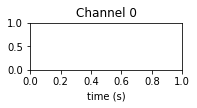

In [11]:
ax = np.linspace(0, 700, 700, endpoint=True)
for i in range(8):
    plt.subplot(4,2,i+1)
    plt.title("Channel "+str(i))
    plt.xlabel("time (s)")
    column = "Sensor "+str(i)
    l = list(Dataset.get(column))
    plt.plot(ax, l,"blue")
    plt.grid()

plt.draw()
plt.show()

In [ ]:
for i in range(8):
    plt.subplot(4,2,i+1)
    plt.title("Channel "+str(i))
    plt.xlabel("frequencia (f)")
    column = "Sensor "+str(i)
    l = list(Dataset.get(column))
    plt.plot(abs(np.fft.rfft(l)[:100]))
    plt.grid()

plt.draw()
plt.show()

In [ ]:
plt.plot(abs(np.fft.rfft(l)[:100]))

In [ ]:
# https://fiiir.com/

s = abs(np.fft.rfft(l))


# Configuration.
fS = 200  # Sampling rate.
fH = 10  # Cutoff frequency.
N = 59  # Filter length, must be odd.

# Compute sinc filter.
h = np.sinc(2 * fH / fS * (np.arange(N) - (N - 1) / 2))

# Apply window.
h *= np.blackman(N)

# Normalize to get unity gain.
h /= np.sum(h)

# Create a high-pass filter from the low-pass filter through spectral inversion.
h = -h
h[(N - 1) // 2] += 1
s = np.convolve(s, h)

plt.plot(s[:100])

In [12]:
rec = np.fft.irfft(s[:100])
plt.plot(s)

NameError: name 's' is not defined

In [13]:
plt.plot(l)

NameError: name 'l' is not defined

In [14]:
plt.specgram(l,Fs=200)

NameError: name 'l' is not defined

NameError: name 'Dataset' is not defined

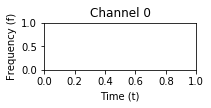

In [15]:
for i in range(8):
    plt.subplot(4,2,i+1)
    plt.title("Channel "+str(i))
    plt.xlabel("Time (t)")
    plt.ylabel("Frequency (f)")

    column = "Sensor "+str(i)
    l = list(Dataset.get(column))
    plt.specgram(l,Fs=200,cmap=plt.cm.gray_r)
    plt.grid()

plt.draw()
plt.show()

## Feature selection
https://machinelearningmastery.com/feature-selection-machine-learning-python/

PCA - Principal Component Analysis

In [3]:
url = './datasets/oficial/features.csv'
# Dataset is now stored in a Pandas Dataframe

#Pandas dataset
Dataset_0 = pd.read_csv(url)
Dataset = Dataset_0.drop('Label',axis=1)
# print(Dataset.head(10))

from sklearn.decomposition import PCA
X = Dataset.values
# print(X)
pca = PCA(n_components=6)
fit = pca.fit_transform(X)
fit2 = pca.fit(X)
print("Explained Variance: ", fit2.explained_variance_ratio_)
# print(fit.components_)
print(sum(fit2.explained_variance_ratio_))

principalDf = pd.DataFrame(data=fit, columns=['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6'])

finalDf = pd.concat([principalDf, Dataset_0['Label']], axis=1)

print(principalDf.head(10))
print(finalDf.head(10))

Explained Variance:  [0.33577948 0.28251259 0.18540776 0.0663821  0.06124542 0.02239697]
0.9537243301701038
     Feature 1    Feature 2    Feature 3   Feature 4    Feature 5   Feature 6
0   549.012992   -59.740641  1958.869653 -495.603423  -510.911845 -478.011333
1 -2412.193775 -1977.629229  -245.123321 -104.525617  -508.966196   28.149566
2 -2536.090835 -2199.134899   987.754368   37.123383  -197.494369 -131.571850
3   816.349587   257.569560  1267.549925 -199.000980 -1021.033446 -203.738486
4 -1229.017604   604.408696 -1673.977753  741.969081  -416.915223 -720.127142
5 -3006.207412 -2312.675169   714.910682  -77.155681  -543.463714    1.307942
6 -2158.575408  -575.835213  -821.539427 -223.469159 -1439.391511 -349.624245
7  1768.041394  -815.047468  4330.333848  489.442859   285.435354 -233.378485
8 -2094.559442 -1344.496530   658.115259  -49.774762 -1203.094178 -152.771306
9 -1699.372215  -153.531047  1381.789420  419.533003  -947.756014 -302.223065
     Feature 1    Feature 2    Fea

# Logistic Regression

In [4]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, Dataset_0['Label'], test_size=1/7.0, random_state=0)
print(train_x.shape)
pca = PCA(.95)
pca.fit(train_x)
train_x = pca.transform(train_x)
print(train_x.shape)
test_x = pca.transform(test_x)
print(pca.n_components_)

(190, 30)
(190, 6)
6


In [5]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [6]:
logisticRegr.predict(test_x[0].reshape(-1, 6))

array([1])

In [30]:
logisticRegr.predict(test_x[0:30])

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0])

In [31]:
print(test_y[0:30])

130    1
203    0
170    0
66     1
181    0
141    0
44     1
71     1
64     1
8      1
83     1
37     1
5      1
199    0
63     1
166    0
106    1
204    0
202    0
89     1
109    1
191    0
124    1
74     1
76     1
12     1
157    0
159    0
123    1
144    0
Name: Label, dtype: int64


In [15]:
logisticRegr.score(test_x, test_y)

0.875

# Support Vector Machine

In [38]:
from sklearn import svm
clf = svm.SVC(C=0.2, gamma='scale', decision_function_shape='ovr')
clf.fit(train_x, train_y)
print(clf.support_vectors_)

[[-3876.4904194     73.2325906   -695.88822486  -591.57151385
    333.36645755  -201.40306609]
 [-1310.40185788   449.88819845  1107.71902946  -582.40946723
    -80.15096493   177.94679266]
 [ 2946.1659885  -1312.03503169  3771.15968368 -1219.85528952
    781.06202516  -437.35161617]
 ...
 [-1073.56892977  -558.35720987  -394.88145025   479.17719931
    845.29626298   274.41816506]
 [  531.41035314 -2668.9747367   1695.82215663   814.5734648
   -283.79926196  -166.57361597]
 [ 4629.11528145  -467.18607113  -962.9994529  -1099.00174849
    565.13333182  -112.98035646]]


In [39]:
clf.predict(test_x)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [40]:
clf.score(test_x, test_y)

0.625

# Random Forests

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [42]:
X, y = make_classification(n_samples=1000, n_features=6,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                             random_state=0)
clf.fit(train_x, train_y)  

print(clf.feature_importances_)

print(clf.predict(test_x[0:10]))
print(test_y[0:10])

[0.14834615 0.25234878 0.08394484 0.15667831 0.08683088 0.27185105]
[1 0 0 1 0 0 1 1 1 1]
130    1
203    0
170    0
66     1
181    0
141    0
44     1
71     1
64     1
8      1
Name: Label, dtype: int64


In [43]:
clf.score(test_x, test_y)

0.90625

# Mais prints do pca kkk

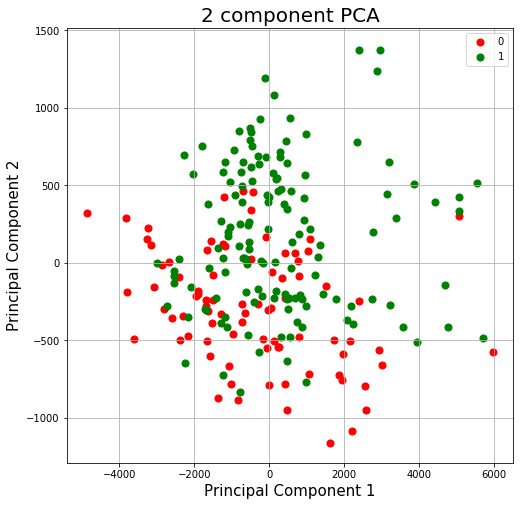

In [4]:

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Feature 1']
               , finalDf.loc[indicesToKeep, 'Feature 6']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


In [ ]:
for i in range(8):
    plt.subplot(3,2,i+1)
    plt.title("Channel "+str(i))
    plt.xlabel("time (s)")
    column = "Feature "+str(i)
    l = list(Dataset.get(column))
    plt.plot(ax, l,"blue")
    plt.grid()

plt.draw()
plt.show()


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Feature 1']
               , finalDf.loc[indicesToKeep, 'Feature 6']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


# ICA

In [5]:
from sklearn.decomposition import FastICA
from pylab import *
from skimage import data, io, color

In [12]:
ica = FastICA(n_components = 6)
ica_features = ica.fit_transform(X)
print(ica_features)

[[ 2.90708674e-02  2.61748671e-02 -6.60131769e-02  4.70918711e-02
  -7.99034677e-02 -4.64305707e-02]
 [ 7.24886084e-02  3.04016551e-02 -4.42616848e-02 -7.36675183e-02
   3.83687369e-02 -5.54672261e-05]
 [ 7.11635063e-02  4.43598492e-02 -7.06792877e-02 -6.94132085e-02
  -1.64675952e-02  2.94370696e-02]
 ...
 [ 7.47048375e-02  1.92772034e-02  1.50385795e-01 -1.10986870e-01
   8.11974986e-03 -5.28981608e-03]
 [ 3.11121590e-02 -3.19549296e-02  9.11472044e-02 -3.87108174e-02
   2.75760548e-03 -4.54548120e-04]
 [ 3.52194364e-02 -1.82816897e-03  6.60892552e-02 -9.31497657e-02
  -8.21754397e-02 -7.27437280e-04]]


A taxa de variancia vai diminuindo a medida que os elementos vão perdendo a importância. porém isso pode ser causado por nao termos o sinal anotado, assim nao podendo separar os grupos

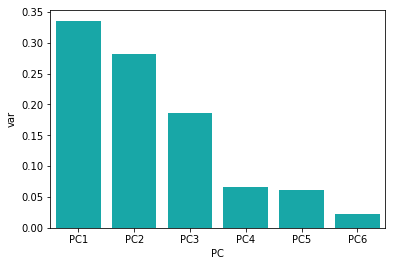

In [59]:
import seaborn as sns
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4','PC5','PC6']})
sns.barplot(x='PC',y="var", data=df, color="c");

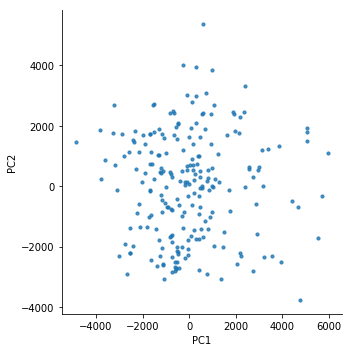

In [60]:
pc = pca.fit_transform(X)
pc_df = pd.DataFrame(data = pc , 
        columns = ['PC1','PC2','PC3','PC4','PC5','PC6'])
pc_df.head()
sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  legend=True,
  scatter_kws={"s": 10}) # specify the point size

## Feature extraction
https://librosa.github.io/librosa/feature.html

Librosa - é uma biblioteca para se trabalhar com audio, mas o nosso sinal pode ser trabalhado de forma análoga 

In [19]:
np.sign(0)

0